In [ ]:
import torch
import numpy as np
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision
import matplotlib.pyplot as plt
from torchvision import datasets, models, transforms
from torch.utils.data import TensorDataset
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler
import time
import os
from os import listdir, mkdir, rename, rmdir
import torch.optim as optim

from torch.optim import lr_scheduler

from os.path import isfile, join, isdir
import random
from datetime import datetime

In [ ]:


from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# location on Google Drive
#master_path = '/content/drive/MyDrive/APS360/data_uncorrupted/'
master_path = '/content/drive/MyDrive/APS360/testdelete/'

In [ ]:
classes = ['0_img_Jordan_11', '0_img_Jordan_12', '0_img_Jordan_3', '0_img_Jordan_4', '0_img_Jordan_6', '0_img_Nike_AF1', '0_img_Nike_Airmax_1', '0_img_Nike_Airmax_97', '0_img_Nike_Dunks', '0_img_Adidas_Ultraboost_4.0', '0_img_Adidas_Yeezy_Boost_350']
#classes = ['Ky5', 'react', 'uboost2']
#classes = ['adidas_Ultra_Boost_2.0']

In [ ]:
# load and transform data using ImageFolder

# resize all images to 224 x 224 #can use resize, or centercrop
"""transform = transforms.Compose([transforms.Resize((256, 256)), 
                                     transforms.CenterCrop(224),
                                     transforms.ToTensor(), 
                                     transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                    std=[0.229, 0.224, 0.225])])
"""
transform = transforms.Compose([transforms.Resize((256, 256)), 
                                     transforms.CenterCrop(224),
                                     transforms.ToTensor()])

In [ ]:
# Load data from Google Drive
dataset = torchvision.datasets.ImageFolder(master_path, transform=transform)

# Dataset sizes
size = len(dataset)
train_size = int(0.6 * size)
valid_size = int(0.2 * size)
test_size = size - train_size - valid_size

batch_size = 32
num_workers = 1

# Splitting datasets
train_data, valid_data, test_data = torch.utils.data.random_split(dataset, [train_size, valid_size, test_size])

# Making dataloader
train = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True, num_workers=num_workers)
valid = torch.utils.data.DataLoader(valid_data, batch_size=batch_size, shuffle=True, num_workers=num_workers)

In [ ]:
#load all the datat into a dataloader
test_loader = torch.utils.data.DataLoader(test_data, batch_size=128, shuffle=True,num_workers=0)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 224, 224])
tensor(5)
tensor([ 5,  9,  2,  1,  8,  1,  0,  0,  8,  5,  7,  2,  3, 10,  0,  0,  0,  9,
         4,  7, 10,  6,  9,  2,  4,  3,  3,  4,  9, 10,  0,  1,  3,  9,  1,  9,
         7,  0,  5,  0,  9, 10,  8,  7,  0,  8,  5,  4,  1,  7,  9,  9,  0, 10,
         9,  7,  5,  4,  7,  2,  7,  3,  0,  2,  3, 10,  7,  8, 10,  9,  8,  8,
         4,  3,  2, 10,  9,  4,  7,  7,  9,  1,  5,  2,  1,  0,  4,  8,  6,  1,
         2,  7,  8,  9,  0,  4,  9, 10,  1,  4,  8,  3,  2,  0,  4,  8,  7,  0,
         1,  2,  1,  5,  9,  7,  9,  1,  8,  8,  7, 10,  1,  2,  0,  3,  3,  0,
         9,  7])
0_img_Nike_AF1


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 224, 224])
tensor(3)
tensor([ 7,  3,  6,  8,  0,  8,  8,  2,  2,  5, 10,  9,  7,  7,  8,  1,  3,  8,
         4,  7,  1,  4,  9,  2,  4,  9,  8,  2,  0,  3,  8,  3,  4,  0,  8,  9,
         8,  4,  6,  1, 10,  8,  3,  8, 10,  0,  2,  7,  3,  5,  7,  3,  6,  7,
         3,  7,  0,  0,  8,  0,  7,  4,  2,  0,  2,  6,  5,  0,  3,  5,  6,  3,
         9,  8, 10,  2,  2,  0,  3,  6,  9,  3,  6,  8,  6,  4,  8,  9,  1,  9,
         7,  7,  3,  1,  8,  0,  0,  1,  0,  0,  8, 10,  6,  6,  7,  0,  0,  0,
         3,  0,  8,  8,  2,  6,  6,  3,  4,  2,  3, 10,  9, 10,  8,  9,  0,  3,
         4,  7])
0_img_Jordan_4


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 224, 224])
tensor(0)
tensor([ 0,  3,  0,  4,  7,  6,  4,  1,  8,  1, 10,  8,  0,  4,  8,  8,  7, 10,
         9,  1,  4, 10,  7,  4,  4,  8,  4,  9,  9,  2,  8,  3,  4,  3, 10,  8,
         6,  2,  8,  0,  3,  9,  5,  9,  0,  0,  8,  5,  3,  3,  5,  2,  8,  9,
        10,  8,  0,  9,  1,  5,  2,  8, 10,  3,  4,  0,  4,  3,  3,  2,  1,  4,
         8,  8,  5,  9,  0,  2,  6,  7,  9,  3,  8,  8,  8,  9, 10,  7,  8,  0,
         0,  1,  3,  3,  1, 10,  2,  2,  7, 10,  9,  2,  9, 10,  1,  7, 10,  8,
         8,  3,  1,  3,  5, 10,  7,  8,  8, 10,  5,  7,  0,  9,  0,  8,  9,  8,
         0,  1])
0_img_Jordan_11


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 224, 224])
tensor(0)
tensor([ 4, 10,  1,  0,  7,  7,  4,  3,  3,  3,  3, 10,  8,  3, 10,  9,  2,  8,
         9,  3,  2, 10,  0,  0,  8,  7,  0,  9,  8,  6,  4,  4,  5,  4,  4,  3,
         8, 10,  8,  8, 10,  0,  3,  1,  8,  7,  0,  7,  8,  9,  3,  7, 10,  5,
         8,  0,  4,  8,  4,  9,  4,  4,  4,  9, 10,  8,  8,  7,  5,  1,  5,  0,
         2,  0,  2,  1,  8,  4,  2,  0,  9,  8,  8,  8,  0,  2,  8,  3,  5,  5,
         0,  3,  2,  4,  6,  8,  5,  0,  3,  4,  5, 10,  1, 10,  1,  1,  6,  4,
         3,  3,  9, 10,  0,  4,  7,  4,  6,  3,  6,  4,  2,  4,  3,  8,  0,  9,
         6,  8])
0_img_Jordan_11


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 224, 224])
tensor(2)
tensor([ 3,  9,  3, 10,  2,  8,  7,  9,  6,  0,  6,  1,  7,  0,  3,  6,  8,  3,
         2,  0,  0,  5,  0, 10,  4,  6,  8,  4,  4,  0,  1,  3, 10,  7,  9,  3,
         9,  8, 10,  1,  3,  9,  2,  1,  8,  8,  9,  8,  9,  0,  6,  8,  9,  0,
         9, 10,  4,  4,  0, 10,  1,  3,  9,  4,  6,  5,  9,  0,  7,  0,  0,  3,
         9,  9,  7,  8,  9,  4,  1,  9,  4,  7,  1,  1,  0,  5,  0,  9,  8,  7,
         0,  6,  6,  0,  0,  7,  0,  0,  8,  0,  9,  7,  3,  7,  9,  8,  9,  9,
         1,  6,  1,  6,  9,  0,  9,  0,  9,  3,  3, 10,  9,  0,  8,  9,  7,  2,
         0,  8])
0_img_Jordan_3


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 224, 224])
tensor(9)
tensor([ 1,  0,  7,  3,  9,  9,  8,  2,  7, 10,  9,  8,  3,  7, 10,  5,  6,  8,
         8,  9,  7,  4,  4,  4,  1, 10,  4,  0,  4,  3,  0,  8,  3,  9,  0,  1,
         0,  8,  4,  7,  5,  8,  8,  8,  3,  7,  4, 10,  0, 10,  9,  4,  9,  9,
         0,  0,  2,  9,  6,  4,  8,  8,  8,  8,  3,  4,  6,  3,  2,  9,  5,  8,
         0,  1,  9,  2,  7,  8,  1,  7,  0,  4,  8,  5,  0,  8,  8,  7,  3,  0,
         3,  1,  4,  9,  8,  3,  4,  7,  9,  7,  6,  2,  8,  8, 10,  4,  1, 10,
         6,  7,  7,  1, 10,  1,  0,  6,  0,  4,  7,  7,  9, 10,  9,  6,  5,  8,
         9,  3])
0_img_Adidas_Ultraboost_4.0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 224, 224])
tensor(0)
tensor([10,  8,  0,  0, 10,  7,  0,  0,  7,  1,  4,  4,  0,  8,  4,  1,  8,  2,
         8,  2,  8,  0,  0,  3,  3,  3,  8,  7,  1,  9,  8,  6,  7,  3, 10,  2,
         7,  7,  3,  7,  2,  4,  2,  6,  8,  1,  6, 10,  9,  1,  9,  8,  2,  2,
         9,  2,  2,  1,  0,  5,  2,  3, 10,  5,  2, 10, 10,  8,  0,  0,  1,  4,
         9,  7,  8,  1,  9,  0,  0,  0,  8,  0,  1,  7,  0,  1,  9,  0,  3,  1,
         8,  5,  6,  3,  0,  4,  2,  7,  0,  1,  6,  7,  4,  9,  6,  7,  0,  8,
         8,  8,  9,  3, 10,  2,  8,  9,  8,  1,  1,  3,  8, 10,  3,  3,  2,  7,
         2,  7])
0_img_Jordan_11


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 224, 224])
tensor(7)
tensor([ 9,  7,  1, 10,  5,  5,  8,  7,  9,  0,  7,  8,  3, 10, 10,  2,  0,  3,
         3,  7,  8,  7,  0,  2,  0,  2, 10,  1, 10,  9,  8,  9,  3,  7,  0,  3,
         0,  9,  3,  2,  9,  4,  9,  3,  3, 10,  8, 10,  0,  4,  7,  0,  8,  3,
         2,  9,  2, 10,  1,  8,  8,  6,  3,  9,  1,  8,  7,  9,  4,  2,  8, 10,
         9,  4,  0,  3,  3,  9,  9,  8, 10,  2, 10,  8,  9,  7,  8,  9,  9,  5,
         8,  9,  0,  7,  5,  6, 10,  3,  9,  2,  4,  7,  1,  2,  9,  9,  5,  9,
         0,  8,  0,  0, 10,  8,  8,  9,  9,  1,  9,  3,  8,  4,  4,  5,  2, 10,
         9,  0])
0_img_Nike_Airmax_97


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 224, 224])
tensor(6)
tensor([0, 7, 7, 0, 3, 1, 2, 3, 6, 4, 1, 0, 4, 0, 8, 0, 0, 0, 8, 9, 0])
0_img_Nike_Airmax_1


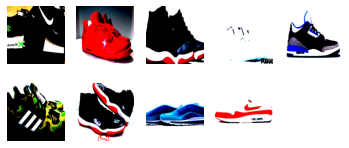

In [ ]:
#visualize loader
k=0
for images, labels in test_loader:
  image = images[k]
  print(image.size())
  # place the colour channel at the end, instead of at the beginning 
  img = np.transpose(image, [1,2,0])
  print(labels[k])
  print(labels) 
  print(classes[labels[k].item()])
  plt.subplot(3, 5, k+1)
  plt.axis('off')
  plt.imshow(img)
  k += 1 
  if k > 10:
    break

In [ ]:
def display_demo(train):  
  # Verification Step - obtain one batch of images
  dataiter = iter(train)
  images, labels = dataiter.next()
  images = images.numpy() # convert images to numpy for display

  classes = ['0_img_Jordan_11', '0_img_Jordan_12', '0_img_Jordan_3', '0_img_Jordan_4', '0_img_Jordan_6', '0_img_Nike_AF1', '0_img_Nike_Airmax_1', '0_img_Nike_Airmax_97', '0_img_Nike_Dunks', '0_img_Adidas_Ultraboost_4.0', '0_img_Adidas_Yeezy_Boost_350']


  # plot the images in the batch, along with the corresponding labels
  fig = plt.figure(figsize=(25, 4))
  for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    plt.imshow(np.transpose(images[idx], (1, 2, 0)))
    ax.set_title(classes[labels[idx]])

  print("Train size: ", len(train_data))
  print("Valid size: ", len(valid_data))
  print("Test size: ", len(test_data))

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Train size:  3135
Valid size:  1045
Test size:  1045


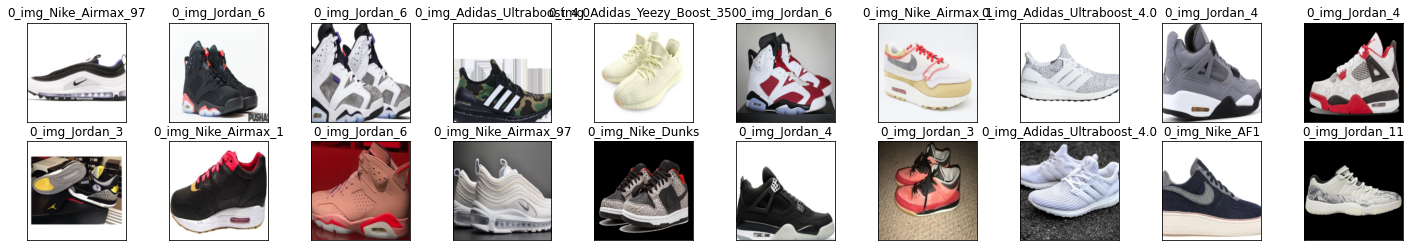

In [ ]:
display_demo(train)

In [ ]:
print(train.classes)

AttributeError: ignored

In [ ]:
#find number of images per class; bring each class up to 1500 samples
classes = ['0_img_Jordan_11', '0_img_Jordan_12', '0_img_Jordan_3', '0_img_Jordan_4', '0_img_Jordan_6', '0_img_Nike_AF1', '0_img_Nike_Airmax_1', '0_img_Nike_Airmax_97', '0_img_Nike_Dunks', '0_img_Adidas_Ultraboost_4.0', '0_img_Adidas_Yeezy_Boost_350']

class_dict = {}
class_num = []
new_train_data = []
for i in classes:
  class_dir = master_path + i + '/'
  file_names = [f for f in listdir(class_dir) if isfile(join(class_dir, f))]
  num_in_class = len(file_names)
  class_dict[i] = num_in_class
  num_to_fill = 1500 - num_in_class

  #create subset based on filenames
  train_data_subset = torch.utils.data.Subset(train_data,range(sum(class_num),sum(class_num)+len(file_names)))
  # print(len(train_data_subset),num_in_class)

  #to confrim classes were captured
  # class_as_num = [i[1] for i in train_data_subset]
  # print(set(class_as_num))

  #if number of images to fill is greater than num images in the class itself, append subsets until count is reached
  if num_to_fill > num_in_class:
    # print(num_to_fill)
    count = num_in_class*2
    augmented_train_data = torch.utils.data.Subset(train_data_subset,range(num_in_class))
    while count < 1500:
      augmented_train_data += torch.utils.data.Subset(train_data_subset,range(num_in_class))
      count += num_in_class
    # print(count)
    # print(len(augmented_train_data)+num_in_class)
    augmented_subset = torch.utils.data.Subset(augmented_train_data,range(num_to_fill))
  else:
    augmented_subset = torch.utils.data.Subset(train_data_subset,range(num_to_fill))

  augmented_tx = transforms.Compose([transforms.Resize((256, 256)), 
                                     transforms.CenterCrop(224),
                                     transforms.RandomRotation(30),
                                     transforms.RandomInvert(),
                                     transforms.ToTensor(),
                                     transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                    std=[0.229, 0.224, 0.225])])
  augmented_subset.dataset.transform = augmented_tx
  augmented_train_data = train_data_subset + augmented_subset
  # print(len(augmented_train_data))

  #to confrim classes were captured
  # aug_class_as_num = [i[1] for i in augmented_train_data]
  # print(set(aug_class_as_num))  

  class_num.append(num_in_class)
  new_train_data.append(augmented_train_data)

train_data.transform=data_transform

train_data = torch.utils.data.dataset.ConcatDataset(new_train_data)
print("Complete")


FileNotFoundError: ignored

In [ ]:
alexnet = torchvision.models.alexnet(pretrained=True)

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


In [ ]:
from torch.utils.data import TensorDataset
def AlexNet_Features_Convert(data):

  loader = torch.utils.data.DataLoader(data, batch_size=1)
  feature_array = np.empty((len(loader), 256, 6, 6))
  label_array = np.empty((len(loader)))

  n = 0

  for imgs, labels in iter(loader):          
      features = alexnet.features(imgs)  
      #Convert to numpy          
      feature_array[n] = features.detach().numpy()
      label_array[n] = labels.detach().numpy()
      if ((feature_array[n]!=features.detach().numpy()).all()):
        print ("Error!")
        print (feature_array[n])
        print(features.detach().numpy())
        break
      
      n += 1
      
  #convert back to tensor
  tensor_feature_array = torch.Tensor(feature_array)
  tensor_label_array = torch.Tensor(label_array)

  new_dataset = TensorDataset(tensor_feature_array,tensor_label_array)
  #new_dataloader = DataLoader(new_dataset)

  return new_dataset

In [ ]:
alex_val_data = AlexNet_Features_Convert(valid_data)
alex_train_data = AlexNet_Features_Convert(train_data)

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


KeyboardInterrupt: ignored

In [ ]:
class TransferNet(nn.Module):
    def __init__(self):
        super(TransferNet, self).__init__()
        self.name = "transfer"
        self.conv1 = nn.Conv2d(256, 256, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(256 * 4 * 4, 256)
        self.fc2 = nn.Linear(256, 88)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        #print (x.shape)
        x = x.view(-1, 256 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [ ]:
class SignClassifierNet(nn.Module):
    def __init__(self):
        super(SignClassifierNet, self).__init__()
        self.name = "SignClassifier"
        self.conv1 = nn.Conv2d(256, 256, 3)
        self.conv2 = nn.Conv2d(256, 256, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(256 * 2 * 2, 256)
        self.fc2 = nn.Linear(256, 88)

    def forward(self, x):
        x = F.leaky_relu(self.conv1(x))
        x = F.leaky_relu(self.conv2(x))
        #print (x.shape)
        x = x.view(-1, 256 * 2 * 2)
        x = F.leaky_relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [ ]:
def get_model_name(name, epoch):

    path = "model_{0}_epoch{1}".format(name,
                                        epoch)
    return path

In [ ]:
def get_accuracy_and_loss(model, data_loader):
    model.eval() 
    correct, total, num_batch, total_loss = 0, 0, 0, 0

    criterion = nn.CrossEntropyLoss()

    with torch.no_grad():
      for imgs, labels in data_loader: # minibatches
          
        #############################################
        #To Enable GPU Usage
        if use_cuda and torch.cuda.is_available():
          imgs = imgs.cuda()
          labels = labels.cuda()
        #############################################
          
        output = model(imgs)
        loss = criterion(output, labels.long())

        pred = output.max(1, keepdim=True)[1]
        correct += pred.eq(labels.view_as(pred)).sum().item()
        total += imgs.shape[0]
        num_batch += 1

    return (correct/total), (loss/num_batch)

In [ ]:
##FROM JACKS CODE

import itertools
from sklearn.metrics import confusion_matrix

@torch.no_grad()
def get_all_preds(model, loader,valid=False):
    if valid==True:
      model.eval()
    all_preds = torch.tensor([]).cuda()
    all_targets=torch.tensor([]).cuda()
    for batch in loader:
        images, labels = batch
        images=images.cuda()
        labels=labels.cuda()
        preds = model(images)
        all_preds = torch.cat(
            (all_preds, preds)
            ,dim=0
        )
        all_targets=torch.cat((all_targets,labels),dim=0)
    return all_preds,all_targets


def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes, rotation=45)
    plt.yticks(tick_marks,classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
import time
def train(model, train_data, val_data, batch_size=64, learning_rate=2e-4, weight_decay = 0, num_epochs=1):
    train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)
    val_loader = torch.utils.data.DataLoader(val_data, batch_size=batch_size)
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)

    iters, train_loss, val_loss, train_acc, val_acc = [], [], [], [], []
    losses = [], [], [], []

    # training
    n = 0 # the number of iterations
    count = 0 #epoch num 
    start_time = time.time()
    for epoch in range(num_epochs):
        for imgs, labels in iter(train_loader):          
            model.train() #*****************************#
            #############################################
            #To Enable GPU Usage
            if use_cuda and torch.cuda.is_available():
              imgs = imgs.cuda()
              labels = labels.cuda()
            #############################################
            
            out = model(imgs)             # forward pass
            loss = criterion(out, labels.long()) # compute the total loss

            loss.backward()               # backward pass (compute parameter updates)
            optimizer.step()              # make the updates for each parameter
            optimizer.zero_grad()         # a clean up step for PyTorch

            # Calculate metrics every 10 iterations.
            if (n % 10 == 0): 
              iters.append(n)
              (t_acc, t_loss) = get_accuracy_and_loss(model, train_loader)
              (v_acc, v_loss) = get_accuracy_and_loss(model, val_loader)
              train_loss.append(t_loss)
              val_loss.append(v_loss)
              train_acc.append(t_acc ) 
              val_acc.append(v_acc ) 
            n += 1

         # save the current training information
        """iters.append(n)
        losses.append(float(loss)/batch_size)             # compute *average* loss
        train_acc.append(get_accuracy(model,train_loader,valid=True))   #train accuracy
        val_acc.append(get_accuracy(model,val_loader, valid=True))  # compute validation accuracy
        n += 1
        """
        count += 1
        print("Epoch number:", count, "Training Accuracy: {}".format(train_acc[-1]),"Validation Accuracy: {}".format(val_acc[-1]))
        #scheduler.step()    
    
        #Save model every epoch
        model_path = get_model_name(model.name, epoch)
        torch.save(model.state_dict(), model_path)

    #Do one last calculation at the end
    if (n % 10 != 0):
      iters.append(n)
      (t_acc, t_loss) = get_accuracy_and_loss(model, train_loader)
      (v_acc, v_loss) = get_accuracy_and_loss(model, val_loader)

      train_loss.append(t_loss)
      val_loss.append(v_loss)

      train_acc.append(t_acc ) 
      val_acc.append(v_acc ) 


    print('Finished Training')
    end_time = time.time()
    elapsed_time = end_time - start_time
    print("Total time elapsed: {:.2f} seconds".format(elapsed_time))

  # plotting
    plt.title("Training Curve")
    plt.plot(iters, train_loss, label="Train")
    plt.plot(iters, val_loss, label="Validation")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.legend(loc='best')
    plt.show()

    plt.title("Training Curve")
    plt.plot(iters, train_acc, label="Train")
    plt.plot(iters, val_acc, label="Validation")
    plt.xlabel("Iterations")
    plt.ylabel("Training Accuracy")
    plt.legend(loc='best')
    plt.show()

    print("Final Training Accuracy: {}".format(train_acc[-1]))
    print("Final Validation Accuracy: {}".format(val_acc[-1]))
    print("Final Training Loss: {}".format(train_loss[-1]))
    print("Final Validation Loss: {}".format(val_loss[-1]))

    np.savetxt("{}_train_err.csv".format(model_path), np.asarray(train_acc))
    np.savetxt("{}_val_err.csv".format(model_path), np.asarray(val_acc))

    #FROM JACKS CODE
    preds,targets=get_all_preds(model,val_loader,valid=True)
    cm=confusion_matrix(targets.cpu(),preds.argmax(1).cpu())
    plt.figure(figsize=(10,10))
    plot_confusion_matrix(cm,classes,normalize=True)

In [ ]:
torch.cuda.is_available()

True

In [ ]:
%cd '/content/drive/My Drive/APS360/data_uncorrupted'
model = SignClassifierNet()
use_cuda = True
if use_cuda and torch.cuda.is_available():
  model.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')
#train(model, train_data=alex_train_data, val_data=alex_val_data, num_epochs=30, batch_size=64)
train(model, train_data=train_data, val_data=valid_data, num_epochs=30, batch_size=64)

/content/drive/.shortcut-targets-by-id/1tghWnPfTRgsbVaZH5UzLw07dAN2smN_Z/APS360/data_uncorrupted
CUDA is available!  Training on GPU ...


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


RuntimeError: ignored

In [ ]:
transform = transforms.Compose([transforms.Resize((256, 256)), 
                                     transforms.CenterCrop(224),
                                     transforms.ToTensor(), transf])

In [ ]:
from PIL import Image
test_img=Image.open('/content/drive/MyDrive/APS360/Demo/Jordan_11/J11.png') #Ground Truth: Modernism
test_img=transform(test_img)
print(test_img)

x = test_img 
#test_img=test_img.cuda()

'''
prediction=model(test_img)

probs=F.softmax(prediction,1)

plt.style.use("ggplot")
plt.figure(figsize = [8,6])   # [width, height]

x = classes
y = probs.cpu().detach().numpy()[0]
plt.barh(x, y, color='purple')

ticks_x = np.linspace(0, 1, 11)   # (start, end, number of ticks)
plt.xticks(ticks_x, fontsize=10, family='fantasy', color='black')
plt.yticks(size=12, color='black' )
for i, v in enumerate(y):
    plt.text(v, i, "  "+str((v*100).round(1))+"%", color='black', va='center', fontsize=14, fontweight=None)

plt.title('Prediction Probability', family='serif', fontsize=15, style='italic', weight='bold', color='purple', loc='center', rotation=0)
plt.xlabel('Probability', fontsize=12, weight='bold', color='purple')
plt.ylabel('Category', fontsize=12, weight='bold', color='purple')'''

tensor([[[0.9608, 0.9608, 0.9608,  ..., 0.9608, 0.9608, 0.9608],
         [0.9608, 0.9608, 0.9608,  ..., 0.9608, 0.9608, 0.9608],
         [0.9608, 0.9608, 0.9608,  ..., 0.9608, 0.9608, 0.9608],
         ...,
         [0.9608, 0.9608, 0.9608,  ..., 0.9608, 0.9608, 0.9608],
         [0.9608, 0.9608, 0.9608,  ..., 0.9608, 0.9608, 0.9608],
         [0.9608, 0.9608, 0.9608,  ..., 0.9608, 0.9608, 0.9608]],

        [[0.9608, 0.9608, 0.9608,  ..., 0.9608, 0.9608, 0.9608],
         [0.9608, 0.9608, 0.9608,  ..., 0.9608, 0.9608, 0.9608],
         [0.9608, 0.9608, 0.9608,  ..., 0.9608, 0.9608, 0.9608],
         ...,
         [0.9608, 0.9608, 0.9608,  ..., 0.9608, 0.9608, 0.9608],
         [0.9608, 0.9608, 0.9608,  ..., 0.9608, 0.9608, 0.9608],
         [0.9608, 0.9608, 0.9608,  ..., 0.9608, 0.9608, 0.9608]],

        [[0.9608, 0.9608, 0.9608,  ..., 0.9608, 0.9608, 0.9608],
         [0.9608, 0.9608, 0.9608,  ..., 0.9608, 0.9608, 0.9608],
         [0.9608, 0.9608, 0.9608,  ..., 0.9608, 0.9608, 0.

'\nprediction=model(test_img)\n\nprobs=F.softmax(prediction,1)\n\nplt.style.use("ggplot")\nplt.figure(figsize = [8,6])   # [width, height]\n\nx = classes\ny = probs.cpu().detach().numpy()[0]\nplt.barh(x, y, color=\'purple\')\n\nticks_x = np.linspace(0, 1, 11)   # (start, end, number of ticks)\nplt.xticks(ticks_x, fontsize=10, family=\'fantasy\', color=\'black\')\nplt.yticks(size=12, color=\'black\' )\nfor i, v in enumerate(y):\n    plt.text(v, i, "  "+str((v*100).round(1))+"%", color=\'black\', va=\'center\', fontsize=14, fontweight=None)\n\nplt.title(\'Prediction Probability\', family=\'serif\', fontsize=15, style=\'italic\', weight=\'bold\', color=\'purple\', loc=\'center\', rotation=0)\nplt.xlabel(\'Probability\', fontsize=12, weight=\'bold\', color=\'purple\')\nplt.ylabel(\'Category\', fontsize=12, weight=\'bold\', color=\'purple\')'